# Задание 1. Загрузка данных и визуализация

В этом задании мы познакомимся подробнее с тем, как работать с табличными данными и визуализировать их.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

Загрузите [Wine Data Set](https://archive.ics.uci.edu/ml/datasets/wine)

Удобный способ сделать это — использовать модуль [sklearn.datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html).

In [ ]:
# Download dataset
data, labels = load_wine(return_X_y=True, as_frame=True)

И `data`, и `labels` — это N-мерные массивы. **Посмотрите, какие у них размеры**

In [ ]:
# Your code here
print(data.shape)
print(labels.shape)

(178, 13)
(178,)


И какие метки классов представлены.

In [ ]:
# Your code here
print(labels)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


Выведем первые 3 строки датасета.

In [ ]:
data.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


По умолчанию Pandas выводит всего 20 столбцов и 60 строк, поэтому если ваш датафрейм больше, воспользуйтесь функцией `set_option`:

```
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.expand_frame_repr', True)
```

Текущее значение параметра можно вывести подобным образом:

```
pd.get_option("display.max_rows")
```

Выведите, какие значения сейчас, и поменяйте их так, чтобы открывался весь датафрейм.

In [ ]:
# Your code here
print(pd.get_option('display.max_columns'))
print(pd.get_option("display.max_rows"))
print(pd.get_option('display.min_rows'))
print(pd.get_option('display.expand_frame_repr'))

20
60
10
True


In [ ]:
# Your code here
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.set_option('display.min_rows', 178)
pd.set_option('display.expand_frame_repr', True)

Верните значения обратно к тем, что были по умолчанию.

In [ ]:
# Your code here
pd.set_option('display.max_columns', 20)
pd.set_option("display.max_rows", 60)
pd.set_option('display.min_rows', 10)
pd.set_option('display.expand_frame_repr', True)

Выведем названия столбцов:

In [ ]:
print(data.columns)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')


Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом `info`:

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

В нашем случае все колонки имеют тип `float64`.

* **float64**: число с плавающей точкой от $4.9*10^{-324}$ до $1.8*10^{308}$, занимает 8 байт.

Кажется избыточным с учетом разброса значений в колонках. Кстати, какой он? Посмотрим на первые три колонки. Если убрать имена столбцов, то будет выведена вся статистика.

[NumPy Standard Data Types](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html#NumPy-Standard-Data-Types)

In [ ]:
data[['alcohol','malic_acid','ash']].describe()

,alcohol,malic_acid,ash
count,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517
std,0.811827,1.117146,0.274344
min,11.030000,0.740000,1.360000
25%,12.362500,1.602500,2.210000
50%,13.050000,1.865000,2.360000
75%,13.677500,3.082500,2.557500
max,14.830000,5.800000,3.230000


Метод `describe` показывает основные статистические характеристики данных по каждому *числовому признаку*: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

**Изменить тип колонки** можно с помощью метода `astype`. Применим этот метод к признаку *alcohol* и переведём его в int16:

In [ ]:
data['alcohol'] = data['alcohol'].astype('int16')

Переведите остальные признаки в подходящие типы и проверьте, что типы поменялись.

In [ ]:
# Your code here
data[['alcalinity_of_ash', 'magnesium', 'proline']] = data[['alcalinity_of_ash', 'magnesium', 'proline']].astype('int16')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    int16  
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    int16  
 4   magnesium                     178 non-null    int16  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int16  
dtypes: fl

In [ ]:
data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14,1.71,2.43,15,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13,1.78,2.14,11,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13,2.36,2.67,18,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14,1.95,2.50,16,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13,2.59,2.87,21,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**Сортировка**

DataFrame можно отсортировать по значению какого-нибудь из признаков. Например, по *alcohol* (`ascending=False` для сортировки по убыванию):

In [ ]:
data.sort_values(by='alcohol', ascending=False).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14,1.71,2.43,15,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
14,14,1.87,2.38,12,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
172,14,2.51,2.48,20,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
158,14,1.68,2.70,25,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660
56,14,1.70,2.30,16,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970


Сортировать можно и по группе столбцов, подав список с названиями. Попробуйте.

In [ ]:
# Your code here
data.sort_values(by=['alcohol', 'magnesium'], ascending=False).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
39,14,3.99,2.51,13,128,3.0,3.04,0.20,2.08,5.10,0.89,3.53,760
0,14,1.71,2.43,15,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92,1065
20,14,1.63,2.28,16,126,3.0,3.17,0.24,2.10,5.65,1.09,3.71,780
7,14,2.15,2.61,17,121,2.6,2.51,0.31,1.25,5.05,1.06,3.58,1295
16,14,1.92,2.72,20,120,2.8,3.14,0.33,1.97,6.20,1.07,2.65,1280


**Индексация и извлечение данных**

DataFrame можно индексировать по-разному. Для извлечения отдельного столбца можно использовать конструкцию вида `DataFrame['Name']`. Для логической индексации — `df[P(df['Name'])]`, где $P$ — это некоторое логическое условие, проверяемое для каждого элемента столбца *Name*.

Воспользуемся этим для ответа на вопрос: какое среднее содержание магния в алкоголе с крепостью ниже $12\%$?

In [ ]:
data['magnesium'][data['alcohol'] <= 12].mean()

96.15116279069767

Pandas позволяет комбинировать условия через логические операции. Сформулируйте какое-нибудь составное условие.

In [ ]:
# Your code here
data['total_phenols'][(data['alcohol'] <= 11) & (data['flavanoids'] > 2.50)].max()

3.18

**Применение функций к ячейкам, столбцам и строкам**

Применение функции **к каждому столбцу**: `apply`.




In [ ]:
data.apply(np.max)

alcohol                           14.00
malic_acid                         5.80
ash                                3.23
alcalinity_of_ash                 30.00
magnesium                        162.00
total_phenols                      3.88
flavanoids                         5.08
nonflavanoid_phenols               0.66
proanthocyanins                    3.58
color_intensity                   13.00
hue                                1.71
od280/od315_of_diluted_wines       4.00
proline                         1680.00
dtype: float64

Метод apply можно использовать и для того, чтобы применить функцию к каждой строке. Для этого нужно указать `axis=1`. Попробуйте.

In [ ]:
# Your code here
data.apply(np.max, axis=1)

0      1065.0
1      1050.0
2      1185.0
3      1480.0
4       735.0
        ...  
173     740.0
174     750.0
175     835.0
176     840.0
177     560.0
Length: 178, dtype: float64

Применение функции **к каждой ячейке** столбца: `map`.

Например, метод map можно использовать для замены значений в колонке, передав ему в качестве аргумента словарь вида `{old_value: new_value}`.

In [ ]:
d = {2 : 'low', 3 : 'low'}
data['ash'] = data['ash'].map(d)
data.head(2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14,1.71,NaN,15,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13,1.78,NaN,11,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


Попробуйте какую-нибудь свою замену. Например, вы можете подать **lambda-функцию**.

[Лямбда-функции в Python](https://habr.com/ru/companies/piter/articles/674234/)

In [ ]:
# Your code here
data['proanthocyanins'] = data['proanthocyanins'].map(lambda x: data['proanthocyanins'].mean())
data.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14,1.71,2.43,15,127,2.80,3.06,0.28,1.590899,5.64,1.04,3.92,1065
1,13,1.78,2.14,11,100,2.65,2.76,0.26,1.590899,4.38,1.05,3.40,1050
2,13,2.36,2.67,18,101,2.80,3.24,0.30,1.590899,5.68,1.03,3.17,1185
3,14,1.95,2.50,16,113,3.85,3.49,0.24,1.590899,7.80,0.86,3.45,1480
4,13,2.59,2.87,21,118,2.80,2.69,0.39,1.590899,4.32,1.04,2.93,735


**Группировка данных**

В общем случае группировка данных в Pandas выглядит следующим образом:

`df.groupby(by=grouping_columns)[columns_to_show].function()`

Например, выведем статистики по трём столбцам в зависимости от значения признака alcohol.

In [ ]:
columns_to_show = ['malic_acid', 'total_phenols', 'proanthocyanins']

data.groupby(['alcohol'])[columns_to_show].describe(percentiles=[])

malic_acid                                        total_phenols  \
             count      mean       std   min    50%   max         count   
alcohol                                                                   
11            19.0  2.036316  0.900112  0.74  1.990  4.31          19.0   
12            67.0  2.264478  1.121369  0.92  1.750  5.51          67.0   
13            70.0  2.524143  1.221139  0.90  1.875  5.80          70.0   
14            22.0  2.216818  0.861651  1.48  1.870  4.10          22.0   

                                               proanthocyanins            \
             mean       std   min    50%   max           count      mean   
alcohol                                                                    
11       2.397895  0.578788  1.60  2.460  3.38            19.0  1.767895   
12       2.011343  0.543501  1.10  2.000  3.52            67.0  1.408209   
13       2.364429  0.619014  0.98  2.530  3.88            70.0  1.582000   
14       2.850000  0.470956  1.68  2.825  3.85            22.0  2.022727   

                                      
              std   min    50%   max  
alcohol                               
11       0.665086  0.95  1.560  3.58  
12       0.561351  0.41  1.400  3.28  
13       0.502710  0.42  1.560  2.91  
14       0.480458  1.24  2.005  2.96

Сделаем то же самое, но немного по-другому, передав в agg список функций:

In [ ]:
data.groupby(['alcohol'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

malic_acid                       total_phenols                        \
              mean       std  amin  amax          mean       std  amin  amax   
alcohol                                                                        
11        2.036316  0.900112  0.74  4.31      2.397895  0.578788  1.60  3.38   
12        2.264478  1.121369  0.92  5.51      2.011343  0.543501  1.10  3.52   
13        2.524143  1.221139  0.90  5.80      2.364429  0.619014  0.98  3.88   
14        2.216818  0.861651  1.48  4.10      2.850000  0.470956  1.68  3.85   

        proanthocyanins                        
                   mean       std  amin  amax  
alcohol                                        
11             1.767895  0.665086  0.95  3.58  
12             1.408209  0.561351  0.41  3.28  
13             1.582000  0.502710  0.42  2.91  
14             2.022727  0.480458  1.24  2.96

Когда данных много, просто смотреть на цифры крайне неинформативно.

Для визуализации данных в этом курсе мы будем использовать библиотеку `matplotlib`. **Давайте её импортируем**.

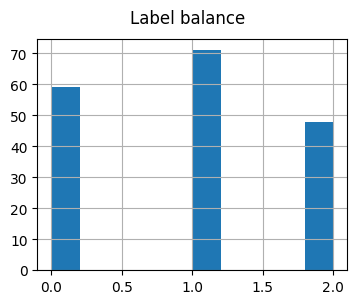

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(4,3))
labels.hist()
plt.suptitle("Label balance")
plt.show()

Объединим данные и метки в один фрейм. Нам это потребуется для упрощения визуализации.

In [ ]:
df = pd.concat([data, labels], axis=1)

Теперь мы можем посмотреть, как меняется средняя крепость алкоголя в зависимости от значения метки в *target*. Реализация функции `plot` в `pandas` основана на библиотеке `matplotlib`.

Здесь `show()` позволяет нам убрать служебные сообщения.

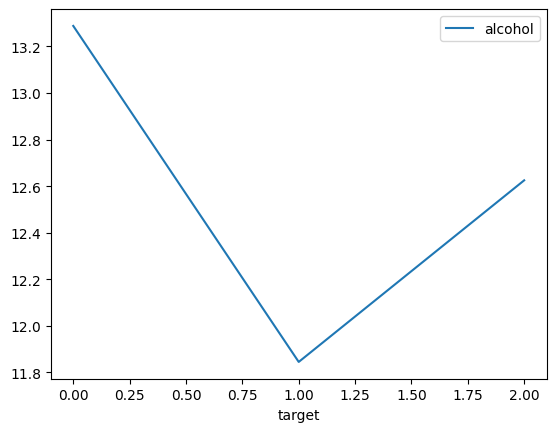

In [ ]:
df.groupby('target')['alcohol'].mean().plot(legend=True)
plt.show()

C помощью параметра kind можно изменить тип графика, например, на **bar chart**. `Matplotlib` позволяет очень гибко настраивать графики. На графике можно изменить почти все, что угодно, но потребуется порыться в документации и найти нужные параметры. Например, параметр `rot` отвечает за угол наклона подписей к оси `x`

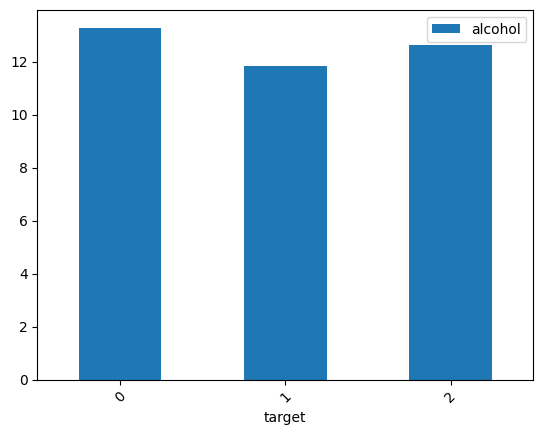

In [ ]:
df.groupby('target')['alcohol'].mean().plot(kind='bar', legend=True, rot=45)
plt.show()

**Seaborn**

Теперь давайте перейдем к библиотеке `seaborn`. `Seaborn` — более высокоуровневое API на базе библиотеки `matplotlib`. `Seaborn` содержит более адекватные дефолтные настройки оформления графиков. Также в библиотеке есть достаточно сложные типы визуализации, которые в `matplotlib` потребовали бы большого количество кода.

Познакомимся с первым таким "сложным" типом графиков pair plot (scatter plot matrix). Эта визуализация поможет нам посмотреть на одной картинке, как связаны между собой различные признаки.

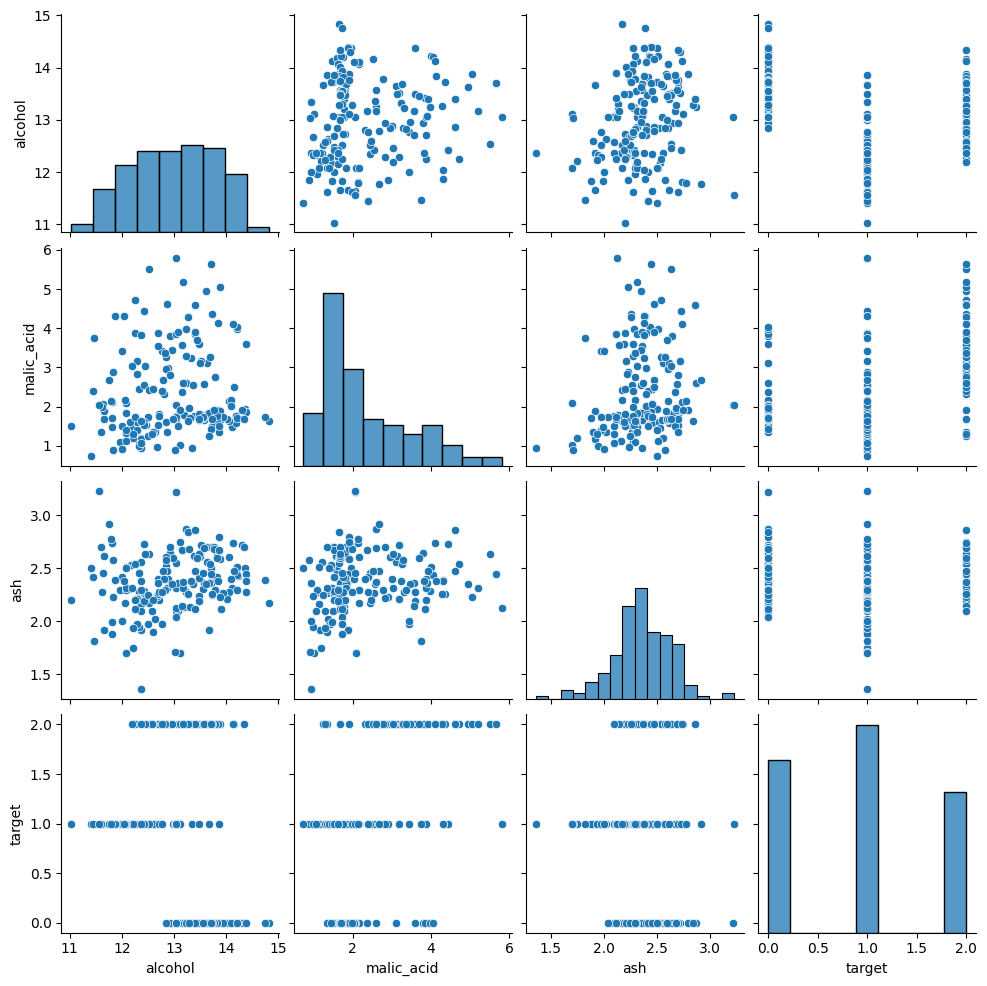

In [ ]:
import seaborn as sns

data, labels = load_wine(return_X_y=True, as_frame=True)
df = pd.concat([data, labels], axis=1)
cols = ['alcohol', 'malic_acid', 'ash', 'target']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot.png')

Как можно видеть, на диагонали матрицы графиков расположены гистограммы распределений признака. Остальные же графики — это обычные `scatter plots` для соответствующих пар признаков.

Для сохранения графиков в файлы стоит использовать метод `savefig`.

Выведите аналогичный график по иным 5 колонкам.

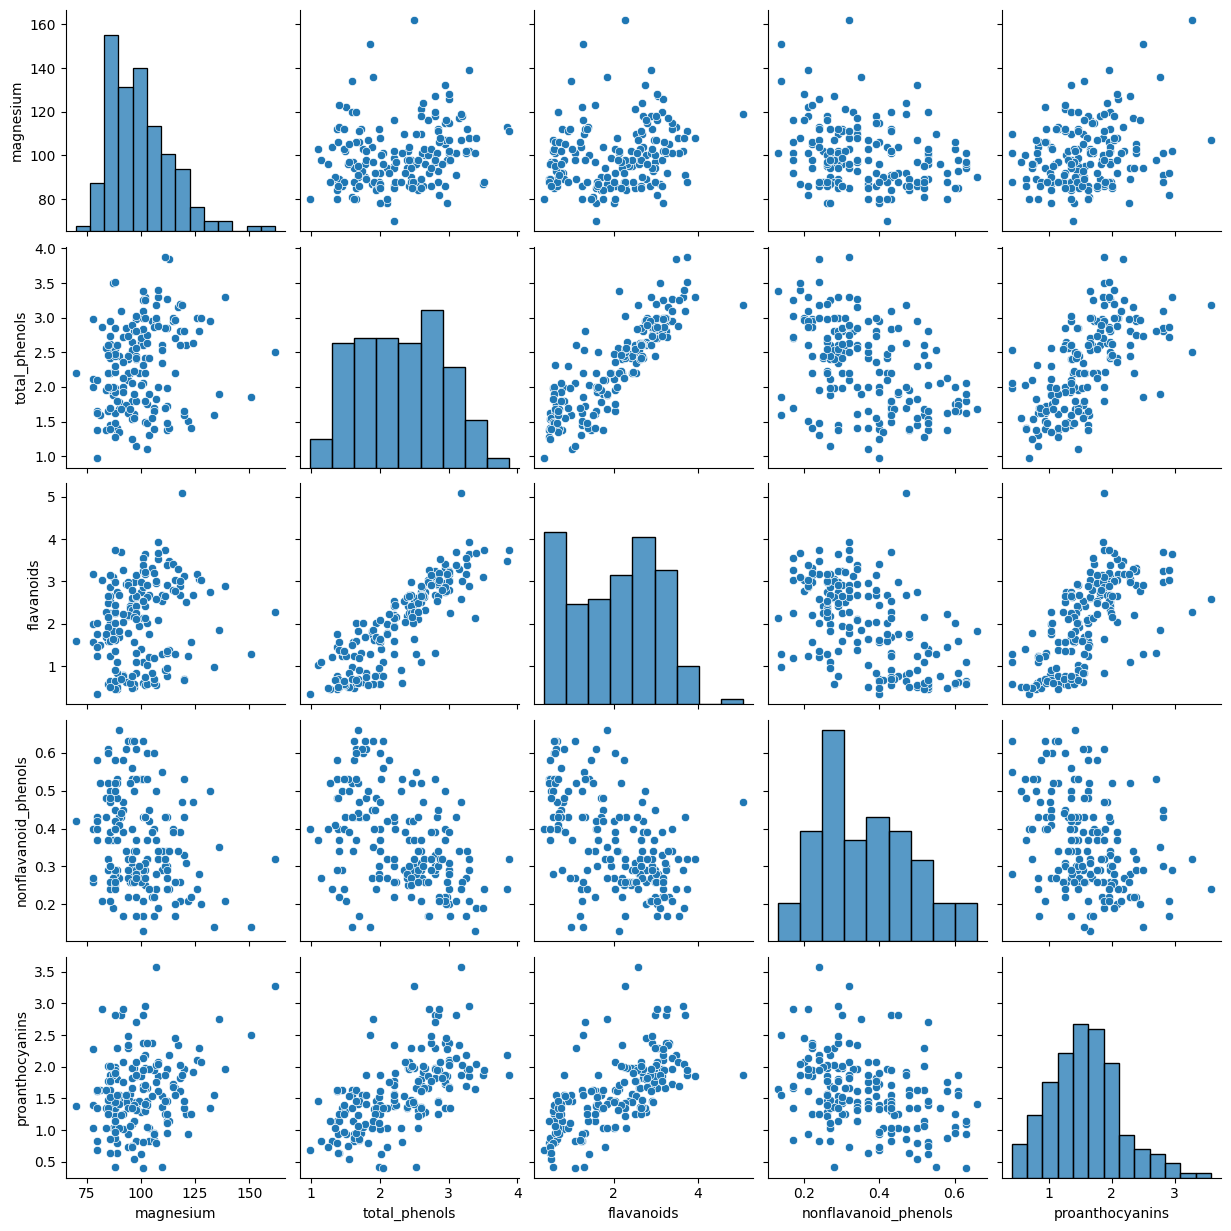

In [ ]:
# Your code here
data, labels = load_wine(return_X_y=True, as_frame=True)
df = pd.concat([data, labels], axis=1)
cols = ['magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins']
sns_plot = sns.pairplot(df[cols])
sns_plot.savefig('pairplot2.png')

С помощью `seaborn` можно построить и распределение dist plot. Для примера посмотрим на распределение `color_intensity`. Обратите внимание, что так тоже можно обращаться к колонкам.

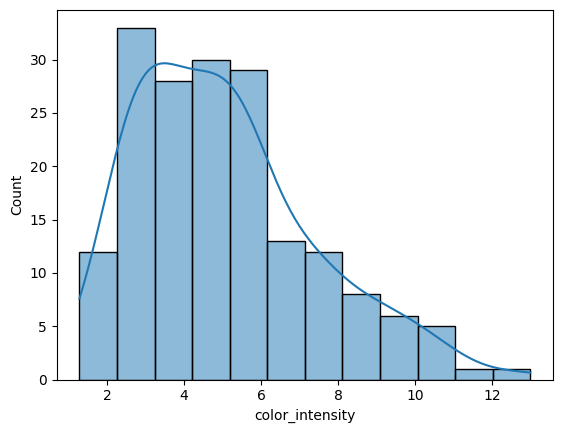

In [ ]:
sns.histplot(df.color_intensity, kde=True)
plt.show()

Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и `joint plot` — это гибрид `scatter plot` и `histogram`. Посмотрим на то, как связаны между собой 5 наиболее крепких напитков и `flavanoids`.

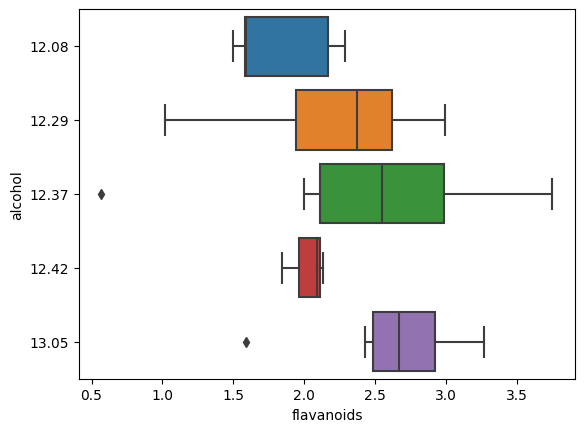

In [ ]:
top_alcohol = df.alcohol.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="alcohol", x="flavanoids", data=df[df.alcohol.isin(top_alcohol)], orient="h")
plt.show()

`Box plot` состоит из коробки (поэтому он и называется `box plot`), усов и точек (иначе его называют *ящик с усами*). Коробка показывает интерквартильный размах распределения, то есть соответственно 25% (Q1) и 75% (Q3) перцентили. Черта внутри коробки обозначает медиану распределения.

Усы отображают весь разброс точек кроме выбросов, то есть минимальные и максимальные значения, которые попадают в промежуток ($Q1 - 1.5*IQR$, $Q3 + 1.5*IQR$), где $IQR = Q3 - Q1$ — интерквартильный размах. Точками на графике обозначаются выбросы (outliers) — те значения, которые не вписываются в промежуток значений, заданный усами графика.

[[wiki] Box plot](https://en.wikipedia.org/wiki/Box_plot)

**Постройте свой ящик с усами!** Для этого выберите какую-нибудь подвыборку данных, которую можно визуально анализировать.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [ ]:
df['magnesium'].describe()

count    178.000000
mean      99.741573
std       14.282484
min       70.000000
25%       88.000000
50%       98.000000
75%      107.000000
max      162.000000
Name: magnesium, dtype: float64

In [ ]:
df['color_intensity'].describe()

count    178.000000
mean       5.058090
std        2.318286
min        1.280000
25%        3.220000
50%        4.690000
75%        6.200000
max       13.000000
Name: color_intensity, dtype: float64

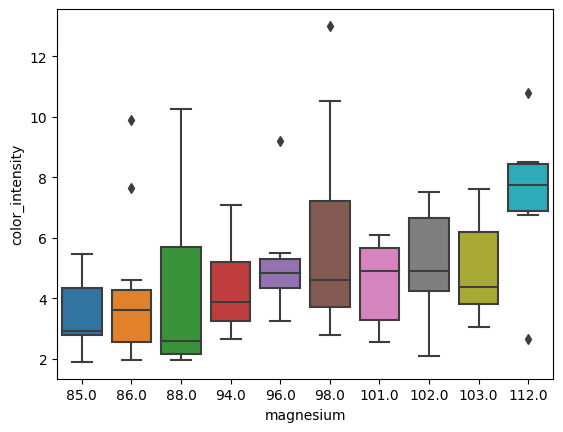

In [ ]:
# Your code here
m_magnesium = df.magnesium.value_counts().sort_values(ascending = False).head(10).index.values
sns.boxplot(x="magnesium", y='color_intensity', data=df[df.magnesium.isin(m_magnesium)], orient="v")
plt.show()

Последний график, который рассмотрим в этом задании — это **heat map**. Сгруппируем значения крепости в 5 бинов (примерно такой же подход при построении гистограмм), и посмотрим на распределение численного признака (`proanthocyanins`) по двум категориальным.

In [ ]:
df['alcoholGroup'] = pd.cut(df['alcohol'], bins=5)

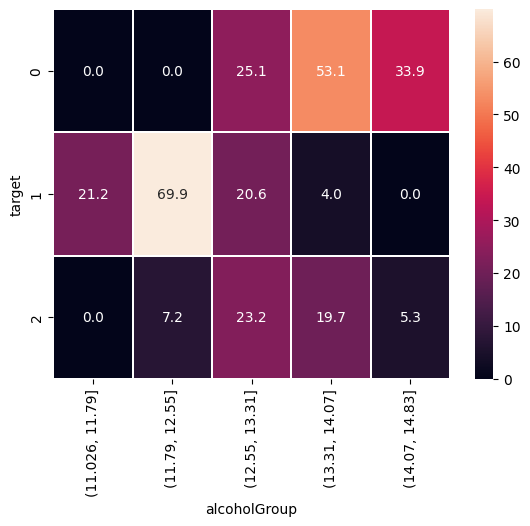

In [ ]:
platform_genre_sales = df.pivot_table(
                        index='target',
                        columns='alcoholGroup',
                        values='proanthocyanins',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.05)
plt.show()

Постройте аналогичную тепловую карту. Быть может, вы ожидаете какие-то закономерности?

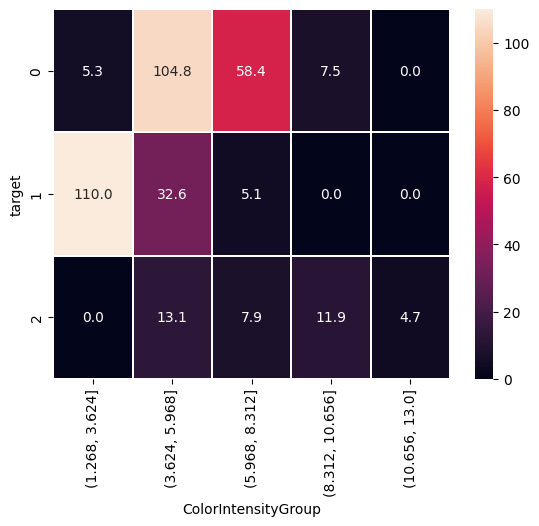

In [ ]:
# Your code here
df['ColorIntensityGroup'] = pd.cut(df['color_intensity'], bins=5)
platform_genre_sales = df.pivot_table(
                        index='target',
                        columns='ColorIntensityGroup',
                        values='flavanoids',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.05)
plt.show()

**Можно ожидать, что содержание в вине флавоноидов, окрашенных ароматических соединений, может влиять на его окраску и насыщенность цвета.**

В дальнейших лекциях и заданиях на основе подобных визуализаций и подсчётов вы будете производить разведочный анализ и строить гипотезы о том, какой **baseline** можно получить, выведя грубую (или не очень) связь между данными и целевой переменной.

В следующем задании вы продложите анализ датасета.

## Формат результата

Результат выполнения — таблицы и графики.

# Задание 2. Алгоритм Nearest Neighbors

Хотя в лекции дан пример для изображений, реализация для табличных данных будет проще либо вообще может не отличаться от предложенной. В данном задании требуется самостоятельно реализовать алгоритм k-NN и применить его.

P.S. Nearest Neighbor — это k-Nearest Neighbors при $k = 1$.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

Загрузим датасет:

In [ ]:
# Download dataset
data, labels = load_wine(return_X_y=True)

Разбейте ваши данные на тренировочную, валидационную и тестовую подвыборки.

Вам пригодится метод `train_test_split()`. Выделите на обучение $60\%$ данных, не забудьте про фиксирование `seed` генератора и *стратификацию* (параметры `random_state=42`, `stratify`).

In [ ]:
# Your code here
x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2, stratify=y_tmp)

In [ ]:
print("x_train", x_train.shape)
print("x_test", x_val.shape)
print("x_test", x_test.shape)

x_train (142, 13)
x_test (28, 13)
x_test (8, 13)


Напишите функцию, которая считает расстояние L1 между 2-мя векторами.


In [ ]:
def compute_L1(a, b):
    return np.sum(np.abs(a - b)) # Your code here

Возьмите первую строку из валидационного набора. Посчитайте расстояние L1 от нее до всех строк тренировочного набора.

В простейшем виде напишите `for loop`. Если вы знаете, что вы делаете, можете использовать *векторизацию*.

In [ ]:
distances = []
for i in range(len(x_train)):
    distances.append(compute_L1(x_val[0], x_train[i]))

In [ ]:
# Your code here
np.array(distances).shape

(142,)

Найдите индекс минимального расстояния.

Используйте `np.argmin()`.

In [ ]:
# Your code here
indx = np.argmin(distances)
indx


115

Выведите на экран свойства первого ириса в валидационном наборе и ириса, который максимально на него похож в тренировочном (по минимальному расстоянию).

In [ ]:
# Your code here
print(x_val[0])
print(x_train[indx])

[1.371e+01 5.650e+00 2.450e+00 2.050e+01 9.500e+01 1.680e+00 6.100e-01
 5.200e-01 1.060e+00 7.700e+00 6.400e-01 1.740e+00 7.400e+02]
[1.34e+01 3.91e+00 2.48e+00 2.30e+01 1.02e+02 1.80e+00 7.50e-01 4.30e-01
 1.41e+00 7.30e+00 7.00e-01 1.56e+00 7.50e+02]


Выведите их метки

In [ ]:
# Your code here
print(y_val[0])
print(y_train[indx])

2
2


Напишите функцию для рассчёта двумерного массива расстояний между двумя выборками (от каждого объекта в первой выборке до каждого объекта во второй выборке).

Рекомендуем заранее создать массив расстояний и заполнить его каким-нибудь очень маленьким числом (например, `np.inf`). Так вы сразу будете отлаживать алгоритм по размерности, а ещё это не будет требовать повторных выделений памяти при росте размера массива.

In [ ]:
def compute_distances(train, sub, distance_func):
    # Your code here
    distances = np.full((sub.shape[0], x_train.shape[0]), np.inf)
    for i in range(sub.shape[0]):
       for j in range(x_train.shape[0]):
         distances[i,j] = distance_func(sub[i], x_train[j])
    return distances

In [ ]:
def compute_distances(train, sub, distance_func):


In [ ]:
distances = compute_distances(x_train, x_val, compute_L1)

In [ ]:
distances.shape

(28, 142)

In [ ]:
distances[12]

array([264.29    , 664.93    , 562.38    , 682.98    ,  17.62    ,
       190.599999, 142.8     , 203.23    , 764.25    , 419.46    ,
        53.92    , 246.01    , 169.22    , 296.35    ,  80.07    ,
       182.02    , 326.26    , 264.16    , 218.32    , 651.35    ,
        47.71    , 256.33    , 522.68    ,  26.84    ,  44.45    ,
       561.78    , 522.36    , 168.73    , 288.43    , 896.91    ,
       130.73    , 677.      , 647.51    , 696.88    , 241.72    ,
        87.07    , 236.29    ,  73.73    , 383.07    ,  32.67    ,
       412.12    , 231.72    , 146.21    , 153.75    , 154.82    ,
        52.35    , 429.1     , 362.28    , 206.1     , 187.84    ,
       467.46    , 269.28    , 310.35    , 125.7     , 159.29    ,
       284.51    , 131.84    , 210.06    , 167.62    , 419.58    ,
       220.08    , 172.22    , 646.19    , 368.05    , 148.04    ,
       641.34    , 265.62    , 211.44    , 383.35    , 291.56    ,
       210.77    , 109.71    ,  57.54    , 400.86    , 156.69 

Определите точность Nearest Neighbors классификации на **валидационном** наборе.

Для этого найдите индекс минимального значения для каждой строки массива distances.

In [ ]:
# Your code here
indx_distances = []
for i in range(len(distances)):
    indx_distances.append(np.argmin(distances[i]))

In [ ]:
indx_distances

[115,
 138,
 136,
 13,
 136,
 23,
 129,
 44,
 106,
 29,
 38,
 14,
 4,
 139,
 81,
 138,
 120,
 60,
 49,
 20,
 85,
 78,
 116,
 126,
 104,
 29,
 37,
 29]

Теперь создадим массив `predicted_class`

In [ ]:
predicted_class = y_train[indx_distances]

И посмотрим, где класс предсказан правильно, а где нет.

In [ ]:
y_val == predicted_class

array([ True, False,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

**Посчитайте точность (accuracy)**

В Python с булевыми значениями можно производить математические операции (`True = 1, False = 0`). Значение accuracy должно быть более $65\%$.

In [ ]:
accuracy_val = np.sum(y_val == predicted_class)/len(y_val == predicted_class) # Your code here
print(f'Accuracy = {accuracy_val * 100:.1f}%')

Accuracy = 78.6%


**Посчитайте точность (accuracy) для валидацинного набора**

In [ ]:
# Your code here
distances_test = compute_distances(x_train, x_test, compute_L1)
indx_distances_test = []
for i in range(len(distances_test)):
    indx_distances_test.append(np.argmin(distances_test[i]))
predicted_class_test = y_train[indx_distances_test]

In [ ]:
y_test == predicted_class_test

array([ True,  True,  True, False,  True,  True,  True,  True])

In [ ]:
accuracy_test = np.sum(y_test == predicted_class_test)/len(y_test == predicted_class_test)
print(f"Accuracy = {accuracy_test * 100:.1f}%")

Accuracy = 87.5%


Повторите все этапы классификации, однако в этот раз **стандартизируйте** данные перед этим. Величина accuracy должна увеличиться.

In [ ]:
# Your code here
from sklearn.preprocessing import StandardScaler

In [ ]:
#x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
#x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2)

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_norm = scaler.transform(x_train)  # scaling data
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)  # scaling data

In [ ]:
distances_sc = compute_distances(x_train_norm, x_val_norm, compute_L1)  # Your code here

In [ ]:
indx_distances_sc = []
for i in range(len(distances_sc)):
    indx_distances_sc.append(np.argmin(distances_sc[i]))
predicted_class_sc = y_train[indx_distances_sc]


In [ ]:
indx_distances_sc = distances_sc.argmin(axis=1)

In [ ]:
predicted_class_sc = y_train[indx_distances_sc]

In [ ]:
y_val == predicted_class_sc

array([False, False,  True, False,  True,  True, False,  True,  True,
       False, False,  True, False, False, False, False,  True,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False])

In [ ]:
accuracy_val = np.mean(y_val == predicted_class_sc)
print(f'Accuracy = {accuracy_val * 100:.1f}%')

Accuracy = 39.3%


**Посчитайте точность (accuracy) для тестового набора**

Теперь учтём, что у нас осталась **тестовая подвыборка**. Проведите необходимые операции и посчитайте accuracy на ней.  

In [ ]:
# Your code here
distances_sc_test = compute_distances(x_train_norm, x_test_norm, compute_L1)

In [ ]:
indx_distances_sc_test = []
for i in range(len(distances_sc_test)):
    indx_distances_sc_test.append(np.argmin(distances_sc_test[i]))
predicted_class_sc_test = y_train[indx_distances_sc_test]

In [ ]:
y_test == predicted_class_sc_test

array([ True, False,  True, False, False, False, False,  True])

In [ ]:
accuracy_test = np.sum(y_test == predicted_class_sc_test)/len(y_test == predicted_class_sc_test)
print(f"Accuracy = {accuracy_test * 100:.1f}%")

Accuracy = 37.5%


Каков результат? Как вы думаете, почему?

**Дополнительно**

Мы использовали accuracy. Как вы помните из лекции, это не самая оптимальная метрика. Попробуйте применить иные метрики.

## Формат результата

Получить значения метрик.

# Задание 3. Nearest Neighbors для картинок

В этом задании вы будете применять написанный в задании 2 алгоритм k-NN для работы с картинками.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from tqdm.notebook import tqdm
from torchvision import datasets
from sklearn.model_selection import train_test_split

Загрузим датасет с помощью функций torchvision фреймворка PyTorch, с которым мы познакомимся дальше в курсе значительно ближе.

Отметьте, что мы загружаем малую часть датасета для ускорения рассчётов, а также сразу проводим базовую нормировку для изображений. Далее в курсе вы познакомитесь с тем, как эффективнее работать с изображениями.

In [ ]:
dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(
    dataset.data / 255,  # Normalize
    np.array(dataset.targets),
    train_size=0.1,  # get only fraction of the dataset
    random_state=42,
    stratify=dataset.targets,
)

Files already downloaded and verified


Посмотрим, что это за датасет.

In [ ]:
data.shape

(5000, 32, 32, 3)

In [ ]:
data[0][0]

array([[0.38431373, 0.28627451, 0.29411765],
       [0.56862745, 0.49019608, 0.50980392],
       [0.58039216, 0.51764706, 0.55686275],
       [0.34509804, 0.29803922, 0.34509804],
       [0.3254902 , 0.28235294, 0.32156863],
       [0.31764706, 0.2745098 , 0.30588235],
       [0.2745098 , 0.23137255, 0.2627451 ],
       [0.25490196, 0.21176471, 0.24313725],
       [0.2745098 , 0.23137255, 0.2627451 ],
       [0.29019608, 0.24705882, 0.27843137],
       [0.29803922, 0.25490196, 0.28627451],
       [0.31372549, 0.27058824, 0.30196078],
       [0.30588235, 0.2627451 , 0.29411765],
       [0.29803922, 0.25490196, 0.28627451],
       [0.32941176, 0.28627451, 0.31764706],
       [0.35294118, 0.30980392, 0.34117647],
       [0.34509804, 0.30196078, 0.33333333],
       [0.3254902 , 0.28235294, 0.31372549],
       [0.32941176, 0.28627451, 0.31372549],
       [0.31372549, 0.27058824, 0.3254902 ],
       [0.36470588, 0.32156863, 0.41568627],
       [0.48627451, 0.43921569, 0.51764706],
       [0.

CIFAR-10 — 4-хмерный массив $\small (N, W, H, C)$, где $\small N$ — количество картинок, $\small W$ — ширина картинки, $\small H$ — высота картинки, $\small C$ — количество каналов (RGB).

Создайте subplots с 2-мя строками и 2-мя столбцами и отобразите 4 любых картинки из `data`.
Используйте `plt.imshow()`.

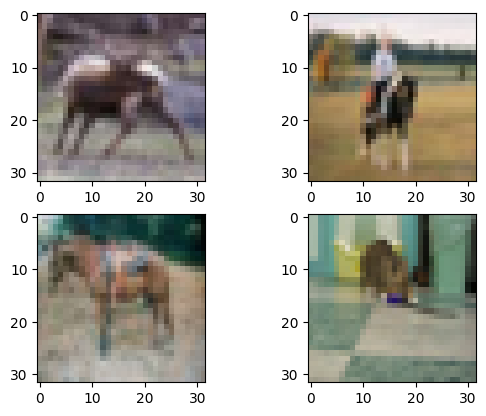

In [ ]:
fig, ax = plt.subplots(2, 2)# Your code here

ax[0, 0].imshow(data[0])# Your code here
ax[0, 1].imshow(data[1])# Your code here
ax[1, 0].imshow(data[2])# Your code here
ax[1, 1].imshow(data[3])# Your code here
plt.show()

Разбейте датасет на тренировочный, валидационный и тестовый наборы. Укажите аргументы `random_state=42`, `stratify`.

In [ ]:
# Your code here
x_train, x_tmp, y_train, y_tmp = train_test_split(data, labels, test_size=0.2, random_state=42, stratify=labels)
x_val, x_test, y_val, y_test = train_test_split(x_tmp, y_tmp, test_size=0.2, stratify=y_tmp)
print("x_train", x_train.shape)
print("x_train", x_val.shape)
print("x_test", x_test.shape)

x_train (4000, 32, 32, 3)
x_train (800, 32, 32, 3)
x_test (200, 32, 32, 3)


Возьмите первую картинку из валидационного набора и найдите ее ближайшего соседа из тренировочного. **Не используйте** в задании библиотечную реализацию k-NN.

In [ ]:
def compute_L1(a, b):
    return np.sum(np.abs(a - b)) # Your code here

In [ ]:
# Your code here
distances = []
for i in range(len(x_train)):
    distances.append(compute_L1(x_val[0], x_train[i]))

In [ ]:
indx = np.argmin(distances)# Your code here
print(indx)

1074


**Отобразите эти картинки на subplots с `ncols=2`**

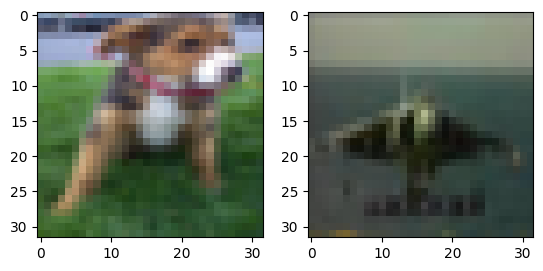

In [ ]:
fig, ax = plt.subplots(1, 2) # Your code here
ax[0].imshow(x_val[0])# Your code here
ax[1].imshow(x_train[indx])# Your code here
plt.show()

**Посмотрите, какой класс предсказывается**

In [ ]:
class_pred = y_train[indx]
class_to_idx = dataset.class_to_idx

print(list(class_to_idx.keys())[list(class_to_idx.values()).index(class_pred)])

airplane


Возьмите первую картинку из тестового набора и найдите k ее ближайших соседей (k-NN) из тренировочного набора.

Используйте `np.argsort()` или иной способ.

In [ ]:
k = 5
distances = []
for i in range(len(x_train)):
    distances.append(compute_L1(x_test[0], x_train[i]))
indx = np.argsort(distances)[0:k]
print(*indx)
 # Your code here

3931 1657 3534 423 1746


Отобразите ближайших соседей в виде subplots:

In [ ]:
fig, ax = # Your code here
# Your code here
plt.show()

Посчитайте k-NN для всего датасета.

Чем больше данных, тем дольше процесс. Реализуйте функцию для расчета расстояний. Если вы используете `for loops`, то сделайте к ним *progress bars* с помощью [tqdm](https://github.com/tqdm/tqdm).

Примечание: если используете вложенные циклы, то используйте `tqdm` только на внешнем цикле. Иначе время работы существенно увеличится.

In [ ]:
def compute_distances(train, val, distance_func):
    # Your code here

    return distances

In [ ]:
distances = compute_distances(x_train, x_val, compute_L1)

Теперь найдите k ближайших соседей и предскажите класс.

Используйте моду [scipy.stats.mode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html) по ближайшим найденным соседям.

In [ ]:
def get_accuracy(distances, train_labels, val_labels, k):
    # Your code here
    return accuracy

In [ ]:
accuracy = get_accuracy(distances, y_train, y_val, k)
print(f"Accuracy = {accuracy * 100:.0f}%")

**Посчитайте точность для k=1..100 и постройте график точности от k**

In [ ]:
acc = []
for k in range(1, 100):
    # Your code here

In [ ]:
plt.# Your code here
plt.show()

Поменяйте расстоянние L1 на L2 и сравните точность на всем датасете.

In [ ]:
def compute_L2(a, b):
    return  # Your code here

In [ ]:
distances_l2 = compute_distances(x_train, x_val, compute_L2)

In [ ]:
acc_l2 = []
for k in range(1, 100):
    # Your code here

In [ ]:
plt.# Your code here
plt.# Your code here
plt.legend()
plt.show()

Теперь, выбрав оптимальные параметры с помощью валидационного сета, проверьте качество на **тесте**..

*Примечание*. Для минимизации повторения кода можете сделать функцию из кода выше, в которую в качестве аргументов подаются различные наборы данных.

In [ ]:
# Your code here

Совпали ли результаты с валидацией? Как думаете, почему?

## Формат результата

* График сравнения точности для L1 и L2 при различных k. Выведите на одном графике результаты для валидации и теста.
* Число k, при котором достигается лучшая точность.
* Точность на тесте.

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.0/Exercises/EX01/result_4_task.png" width="300">

# Задание 4. Реализация k-NN

В этом задании мы поработаем в концепции ОПП (Объектно-Ориентированного Программирования).

[ООП на Python: концепции, принципы и примеры реализации](https://proglib.io/p/python-oop)

Создайте класс k-NN и реализуйте его методы.

Импорт необходимых библиотек:

In [ ]:
import numpy as np
from scipy.stats import mode
from torchvision import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

Функция, которая считает расстояние L1 между 2-мя векторами:

In [ ]:
def compute_L1(a, b):
    return  # Your code here

Загрузите датасет CIFAR-10 и разбейте его на тренировочный, валидационный и тестовый наборы аналогично тому, как вы сделали это в задании 3. Укажите аргументы `random_state=42`, `stratify`.

In [ ]:
dataset = datasets.CIFAR10("content", train=True, download=True)

np.random.seed(42)
data, _, labels, _ = train_test_split(
    dataset.data / 255,  # Normalize
    np.array(dataset.targets),
    train_size=0.1,  # get only fraction of the dataset
    random_state=42,
    stratify=dataset.targets,
)

# Your code here

Создайте класс k-NN и реализуйте его методы.

In [ ]:
class kNN:
    def __init__(self, k, distance_func):
        self.k = # Your code here
        self.distance_func = # Your code here

    def fit(self, x, y):
        self.train_data = # Your code here
        self.train_labels = # Your code here

    def predict(self, x):
        distances = self.compute_distances(x)
        indexes = np.argsort(distances, axis=1)[:, :self.k]
        labels_of_top_classes = self.train_labels[indexes]
        predicted_class, _ = mode(labels_of_top_classes, axis=1, keepdims=True)
        return predicted_class.flatten()

    def compute_distances(self, test):
        # Your code here

        return distances

In [ ]:
kNN_classifier = kNN(k=1, distance_func=compute_L1)
kNN_classifier.fit(x=x_train, y=y_train)
out = kNN_classifier.predict(x_test)

In [ ]:
np.mean(y_test == out)

Сравните время работы вашей реализации и реализации из sklearn. Используйте `%%time`.

In [ ]:
# Your code here

In [ ]:
# Your code here

In [ ]:
# Your code here

**Оптимальный k-NN. Погружение в ООП**

Эта часть задания даёт дополнительные баллы и не обязательна к выполнению.

Реализуйте выбор ближайших соседей эффективно. Можно сделать [KD дерево](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree), таким образом мы приблизимся к библиотечной реализации.

[[wiki] K-d tree](https://en.m.wikipedia.org/wiki/K-d_tree).

И сравните по эффективности как с исходной (простой) реализацией, так и с библиотечной.

In [ ]:
# Your code here

## Формат результата

Демонстрация времени работы вашей реализации и реализации из sklearn (с помощью %%time)